In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  #to build classification tree
from sklearn.tree import plot_tree   # draws the tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix      #build confusion matrix
from sklearn.metrics import plot_confusion_matrix  #draw confusion matrix

In [77]:
df= pd.read_csv("processed.cleveland.data")

In [78]:
df

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [79]:
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [80]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
df[df['ca'].isnull()==True].index

Int64Index([], dtype='int64')

In [81]:
df['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [82]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [83]:
df['ca'].mode()

0    0.0
Name: ca, dtype: object

In [84]:
df['thal'].mode()

0    3.0
Name: thal, dtype: object

In [10]:
for i in df.columns:
    dfi=df[df[i]=='?'].index
    if len(dfi)==0:
        print(f"{i}-no")
    else:
        print(f"{i} has na")
        print(dfi)
#         for a in dfi:
#             df[i][a]=df[i].mean()
            

age-no
sex-no
cp-no
trestbps-no
chol-no
fbs-no
restecg-no
thalach-no
exang-no
oldpeak-no
slope-no
ca has na
Int64Index([165, 191, 286, 301], dtype='int64')
thal has na
Int64Index([86, 265], dtype='int64')
num-no


In [94]:
df[df['ca']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [69]:
df[df['thal']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [36]:
df['thal'][86]=(df['thal'].mode())

/tmp/ipykernel_4095/86801844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['thal'][86]=(df['thal'].mode())


In [12]:
df['thal'][86]

'?'

In [70]:
df['thal'].mode()[0]

'3.0'

In [15]:
df[df['ca']=='?'].index

Int64Index([165, 191, 286, 301], dtype='int64')

In [175]:
dfd=df.copy()

In [176]:
dfd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [24]:
for i in dfd.columns:                                 #to drop dataset with ? values
    dfi=dfd[dfd[i]=='?'].index
    if len(dfi)==0:
        print(f"{i}-no")
    else:
        print(f"{i} has na")
        print(dfi)
        for x in dfi:
            dfd.drop(x,inplace=True)

age-no
sex-no
cp-no
trestbps-no
chol-no
fbs-no
restecg-no
thalach-no
exang-no
oldpeak-no
slope-no
ca has na
Int64Index([191, 286, 301], dtype='int64')
thal has na
Int64Index([86, 265], dtype='int64')
num-no


In [177]:
dfd[dfd['ca']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [92]:
 dfd.drop(165,inplace=True)

In [111]:
dfd[dfd['ca']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [26]:
dfd[dfd['thal']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [38]:
type(dfd.mode())

pandas.core.frame.DataFrame

In [112]:
dfd['ca'].mode()[0]

'0.0'

In [99]:
dfd['ca'].replace('?',2,inplace=True)

In [113]:
dfd.iloc[[165,191,286,301]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [178]:
for i in dfd.columns:                                 #to change values of ? with mode
    if len(dfd[dfd[i]=='?'].index)==0:
        print(f"{i}-no")
    else:
        print(f"{i} has na")
        dfd[i].replace('?',(dfd[i].mode()[0]),inplace=True)
        print("? replaced with mode")
            

age-no
sex-no
cp-no
trestbps-no
chol-no
fbs-no
restecg-no
thalach-no
exang-no
oldpeak-no
slope-no
ca has na
? replaced with mode
thal has na
? replaced with mode
num-no


In [179]:
dfd[dfd['ca']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [118]:
dfd.iloc[[165,191,286,301]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,0.0,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,0.0,7.0,1
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,0.0,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


In [180]:
dfd[dfd['thal']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [120]:
#splitting the data set into parameters and result

In [196]:
y=dfd['num'].copy()
y

0      2
1      1
2      0
3      0
4      0
      ..
297    1
298    2
299    3
300    1
301    0
Name: num, Length: 302, dtype: int64

In [183]:
x=dfd.drop(columns='num').copy()
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [126]:
x.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

In [127]:
y.dtypes

dtype('int64')

In [184]:
for i in dfd.columns:
    a=dfd[i].unique()
    print(f"{i} uniques- {a}")

age uniques- [67. 37. 41. 56. 62. 57. 63. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
sex uniques- [1. 0.]
cp uniques- [4. 3. 2. 1.]
trestbps uniques- [160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124. 125.
 142. 128. 145. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
chol uniques- [286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263. 199.
 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247. 167.
 230. 335. 234. 233. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261

In [131]:
# sex=male/female
# cp= chest pain (4 types)
# restbp=resting blood press
# chol= cholestrol
# fbs=fasting blood sugar
# restecg=resting ecg result
# thalach= max heart rate achieved
# exang= exercise induced agina
# old peak= Depression induced by exerc relative to rest
# float slope= slope of peak exerc ST segment
# ca= no of major vessels colored by fluoroscopy
# thal= thalium hrt scan

In [ ]:
#Using sklearn column transform for hot encoding (it is used in production)   // it was not working so for now we used get dummies

In [132]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.compose import make_column_transformer

In [133]:
# ohe=OneHotEncoder

In [137]:
# ct=make_column_transformer((ohe, ['ca']),remainder='passthrough')
                          

In [141]:
# ct.fit_transform(x)

In [210]:
#using pandas get dummies for hot encoding
pd.get_dummies(x,columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
1,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
3,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,1,0,0


In [217]:
x_encoded=pd.get_dummies(x,columns=['cp','restecg','slope','thal'])
x_encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,...,0,1,0,0,0,1,0,0,0,1
298,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,...,1,1,0,0,0,1,0,0,0,1
299,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,...,1,1,0,0,0,1,0,0,0,1
300,57.0,0.0,130.0,236.0,0.0,174.0,0.0,0.0,1.0,0,...,0,0,0,1,0,1,0,1,0,0


In [197]:
y.unique()   #since we are only interesed in if a prsn has heart disease or not(and not the type), we will convert
             # values greater than 0 to 1.

array([2, 1, 0, 3, 4])

In [198]:
a=y[y>0].index         #index of y where y>0
a

Int64Index([  0,   1,   5,   7,   8,  11,  15,  21,  22,  23,
            ...
            289, 291, 292, 293, 295, 296, 297, 298, 299, 300],
           dtype='int64', length=139)

In [204]:
a=y[y>0].index                     #replacing y>0 with 1
y[a] = 1

In [205]:
y.unique()

array([1, 0])

In [216]:
x_encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,...,0,1,0,0,1,0,0,1,0,0


In [206]:
y

0      1
1      1
2      0
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    0
Name: num, Length: 302, dtype: int64

In [207]:
#buiding a preliminary classification tree (tree that is not optimized)

In [218]:
x_train,x_test,y_train,y_test= train_test_split(x_encoded,y,random_state=42)

#creating dec tree
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(x_train,y_train)

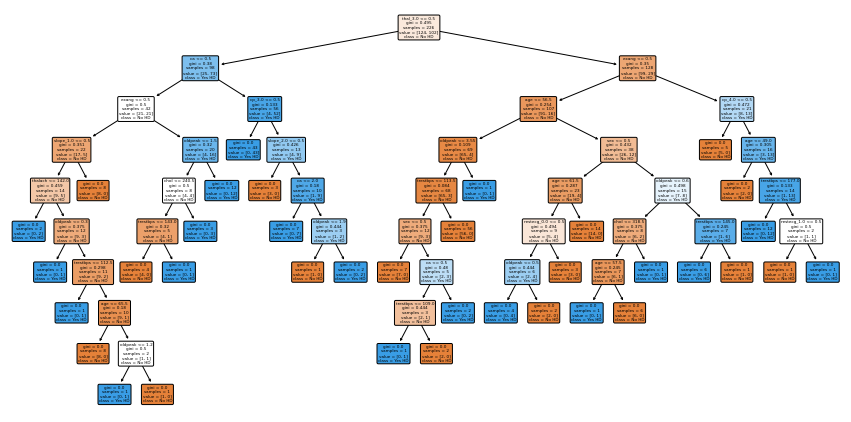

In [221]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=["No HD","Yes HD"],feature_names=x_encoded.columns);

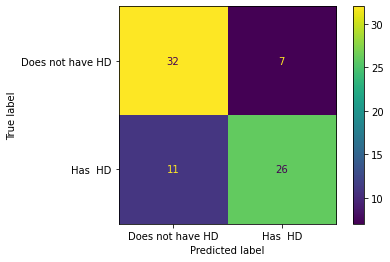

In [222]:
#now we have to check the performance of the dt on test dataset
plot_confusion_matrix(clf_dt,x_test,y_test,display_labels=["Does not have HD","Has  HD"])

In [225]:
"""total ppl with no HD= 43 and with HD = 33 """
"""%classified correctly- has HD 33/43=0.76 , not HD 26/33=0.78"""  #Now we will try to optimize the tree

'%classified correctly- has HD 33/43=0.76 , not HD 26/33=0.78'

In [ ]:
#cost complexity pruning

In [227]:
#figuring out best alpha values  
path=clf_dt.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas= path.ccp_alphas
ccp_alphas= ccp_alphas[:-1]     #excluding max value of alpha
ccp_alphas

array([0.        , 0.0039823 , 0.0039823 , 0.00410872, 0.00530973,
       0.00597345, 0.00663717, 0.00707965, 0.00713998, 0.00737897,
       0.00758534, 0.00796875, 0.00974734, 0.01061947, 0.01127892,
       0.01245259, 0.01335335, 0.01441446, 0.02225558, 0.0304103 ,
       0.03424628, 0.03901029])

In [259]:
len(ccp_alphas)

22

In [228]:
#now we will create decision trees per value of alpha and store it in an array

clf_trees=[]  #array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(x_train,y_train)
    clf_trees.append(clf_dt)

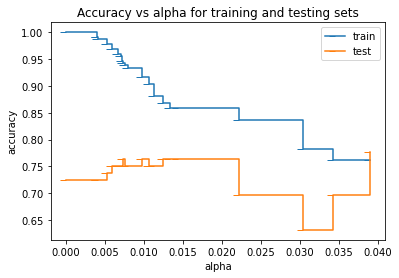

In [241]:
#plot a graph to see accuracy of dt with diff values of alpha

train_scores= [clf_dt.score(x_train,y_train) for clf_dt in clf_trees]      #tree scores of the trees on training data
test_scores= [clf_dt.score(x_test,y_test) for clf_dt in clf_trees]         #tree score of the trees on testing data

fig, ax= plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker=0,label='train',drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker=0,label='test',drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#we see that in graph the max value of accuracy is at alpha 0.038

In [235]:
#understanding one line for operation

a=[1,2,3,4,5]
new=[]
for i in a:
    c=i+1
    new.append(c)

new

[2, 3, 4, 5, 6]

In [238]:
a=[1,2,3,4,5]
new=[i+1 for i in a]
new

[2, 3, 4, 5, 6]

In [242]:
## we got the bst value of alpha 0.038 but another set of data might give a diff result.
##so we will use cross validation to find the best value

<AxesSubplot:xlabel='tree'>

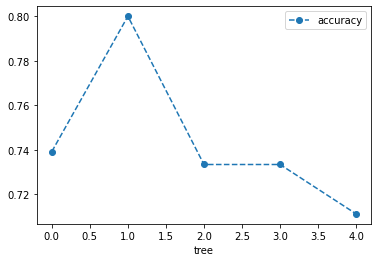

In [247]:
#here we are just checking if alpha=0.038 gives good accuracy for cv=5.
clf_dt= DecisionTreeClassifier(random_state=42,ccp_alpha=0.038)

scores= cross_val_score(clf_dt,x_train,y_train,cv=5)           #5 fold cv 
df = pd.DataFrame(data={'tree': range(5),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [ ]:
#we can see that only for 2nd dataset alpha=0.038 we have good accuracy

In [248]:
#so now we will apply cross validation in our process of finding the best alpha

In [264]:
alpha_loop_values =[] #for storing cv values

#we have the list of best values for alpha                  #my assumption- score/accuracy might be (1-tree score)
#we will now do 5 fold cv for each of them 
#we will calc the mean and std dev of the scores(accuracy) for alphas

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,x_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
    
#alpha_loop_values      #mean value was same as what we calc below

#hum har ek alpha pe 5 accuracy ka value milega (due to 5 fold cv), to hum uska mean lenge aur un sab ke accuracy ka std dev 
#ab is accuracy ko alpha k sath plot krenge



[[0.0, 0.7390338164251208, 0.06454829430979059],
 [0.003982300884955753, 0.7390338164251208, 0.06454829430979059],
 [0.003982300884955753, 0.7390338164251208, 0.06454829430979059],
 [0.004108723135271809, 0.7390338164251208, 0.06454829430979059],
 [0.005309734513274336, 0.7567149758454106, 0.06994368331673816],
 [0.005973451327433627, 0.7568115942028986, 0.06039659818502812],
 [0.00663716814159292, 0.7568115942028986, 0.06039659818502812],
 [0.007079646017699113, 0.7568115942028986, 0.06039659818502812],
 [0.007139983909895417, 0.7568115942028986, 0.06039659818502812],
 [0.007378969286829774, 0.7612560386473429, 0.057624082653273644],
 [0.007585335018963339, 0.7612560386473429, 0.057624082653273644],
 [0.00796875117880936, 0.7612560386473429, 0.057624082653273644],
 [0.009747338720020518, 0.7568115942028986, 0.07230488217198053],
 [0.010619469026548669, 0.752463768115942, 0.08144967650516399],
 [0.011278918728140089, 0.7394202898550725, 0.09379030169087138],
 [0.012452591656131485, 0.7

In [262]:
#alpha_loop_values.append(scores)
#len(alpha_loop_values)             #just to check , it is equal to the len of alphas
#alpha_loop_values
alpha_loop_values[0].mean()        

0.7390338164251208

<AxesSubplot:xlabel='alpha'>

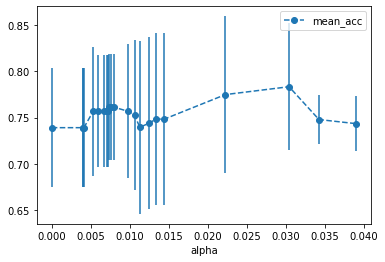

In [265]:
#plotting the graph

alpha_results= pd.DataFrame(alpha_loop_values,columns=['alpha','mean_acc','std'])

alpha_results.plot(x='alpha',y='mean_acc',yerr='std',marker='o',linestyle='--')

In [266]:
#we can see the most accuracy we are getting is near 0.030 (and not 0.038)

In [268]:
#we can find the exact value from the graph
alpha_results[(alpha_results['alpha']>0.028)
             &
             (alpha_results['alpha']<0.032)]

,alpha,mean_acc,std
19,0.03041,0.783382,0.068642


In [310]:
best_alpha=alpha_results[(alpha_results['alpha']>0.028)
             &
             (alpha_results['alpha']<0.032)]['alpha']

best_alpha=float(best_alpha)
best_alpha

0.030410297666934843

In [311]:
#finally build a new decision tree with the best alpha value(pruned decision tree)

clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=best_alpha)
clf_dt_pruned=clf_dt_pruned.fit(x_train,y_train)



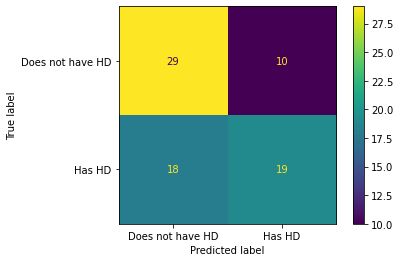

In [312]:
#plotting confusion matrix
plot_confusion_matrix(clf_dt_pruned,x_test,y_test,display_labels=["Does not have HD","Has HD"])

In [ ]:
acc- Does not have HD- 29/47=0.61, hv hd- 19/29=0.65                    #there is a problem it should be higher

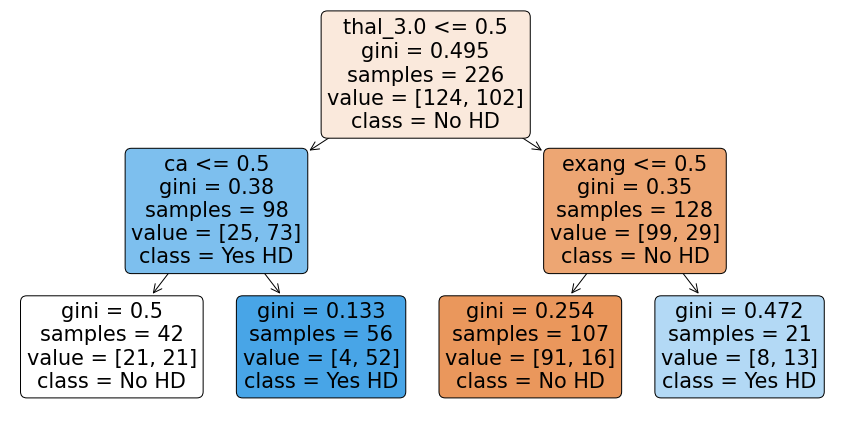

In [293]:
#plotting the tree  - we can see the decision tree is pruned

plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["No HD","Yes HD"],feature_names=x_encoded.columns);

In [313]:
#lets try peak point between 0.005 to 0.010
best_alpha2=alpha_results[(alpha_results['alpha']>0.005)
             &
             (alpha_results['alpha']<0.010)]['alpha'].max()

best_alpha2

0.009747338720020518

In [314]:
clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=best_alpha2)
clf_dt_pruned=clf_dt_pruned.fit(x_train,y_train)

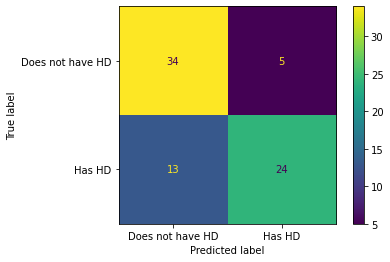

In [315]:
plot_confusion_matrix(clf_dt_pruned,x_test,y_test,display_labels=["Does not have HD","Has HD"])

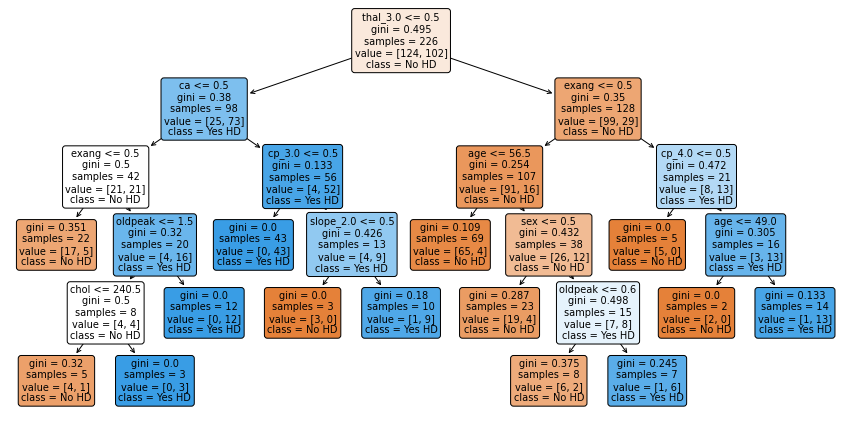

In [317]:
#now we can see we can get a better result at alpha=0.009

#acc= not hv hd 34/47 =0.72, hv hd = 24/29=0.82

plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["No HD","Yes HD"],feature_names=x_encoded.columns);

In [ ]:
##problem - try this again

## we are not getting accuracy greater than alpha=0.038 when we use alpha=0.030(found by including cv)

## ask question what to do in such cases

#(try by dropping '?' data)